#Goal

To understand whether participation in summer Math and English programs has a significant impact on students' credit accumulation in 9th grade.


In [228]:
import numpy as np
import pandas as pd

In [229]:
# Loading sheet into a DataFrame
df = pd.read_excel('excel_data.xlsx')

# Displaying
df.head()

,8th_CHRT,HS_Name,STU_ID,s_male,s_frpl,s_ell,s_sped,std_math_8,std_read_8,math_9,eng_9,sci_9,ss_9,elec_9,sum_math_8,sum_eng_8,total_9,eng_math_9,sum_eng_math,Track Status
0,2016,Benjamin Franklin High School,4363,1,0,0,0,0.70,1.30,1.0,0.5,1.0,1.0,1.5,0,1,5.0,1.5,1,Not On Track
1,2016,Benjamin Franklin High School,475,1,1,0,0,1.80,1.18,1.0,1.0,1.0,1.0,1.0,1,1,5.0,2.0,2,Not On Track
2,2016,Benjamin Franklin High School,2147,0,1,0,0,1.03,1.23,1.0,1.0,1.0,1.0,1.5,1,1,5.5,2.0,2,Not On Track
3,2016,Benjamin Franklin High School,1249,0,0,0,0,-0.14,0.15,1.0,1.0,1.0,1.0,2.0,1,0,6.0,2.0,1,On Track
4,2016,Benjamin Franklin High School,1067,0,1,0,0,0.37,0.47,1.0,1.0,1.0,1.0,1.5,1,1,5.5,2.0,2,Not On Track


In [230]:
# To see the dimension of dataset
df.shape

(11141, 20)

In [231]:
# To see all the columns in the dataset
df.columns

Index(['8th_CHRT', 'HS_Name', 'STU_ID', 's_male', 's_frpl', 's_ell', 's_sped',
       'std_math_8', 'std_read_8', 'math_9', 'eng_9', 'sci_9', 'ss_9',
       'elec_9', 'sum_math_8', 'sum_eng_8', 'total_9', 'eng_math_9',
       'sum_eng_math', 'Track Status'],
      dtype='object')

# Exploring Data

In [232]:
# Checking for duplicate student IDs
duplicates = df[df.duplicated(subset='STU_ID', keep=False)]

print('Duplicate student IDs found:', duplicates)

Duplicate student IDs found: Empty DataFrame
Columns: [8th_CHRT, HS_Name, STU_ID, s_male, s_frpl, s_ell, s_sped, std_math_8, std_read_8, math_9, eng_9, sci_9, ss_9, elec_9, sum_math_8, sum_eng_8, total_9, eng_math_9, sum_eng_math, Track Status]
Index: []


So no duplicates!

In [233]:
# To see the distribution of the gender of students
df.s_male.value_counts()

,count
s_male,
0,5916
1,5225


In [234]:
# To see the distribution of summer math program participants
df.sum_math_8.value_counts()

,count
sum_math_8,
0,8309
1,2832


In [235]:
# To see the distribution of summer english program participants
df.sum_eng_8.value_counts()

,count
sum_eng_8,
0,8274
1,2867


In [236]:
# To see the distribution of whether student qualifies for federal free or reduced lunch program
df.s_frpl.value_counts()

,count
s_frpl,
0,6487
1,4654


In [237]:
# To see the distribution of whether student has been identified as an English Language Learner
df.s_ell.value_counts()

,count
s_ell,
0,10262
1,879


In [238]:
# To see the distribution of whether student received special education services
df.s_sped.value_counts()

,count
s_sped,
0,10205
1,936


In [239]:
# To see the distribution of students in the high schools
df.HS_Name.value_counts()

,count
HS_Name,
John Adams High School,1218
Einsenhower High School,1154
Franklin D. Roosevelt High School,1081
Benjamin Franklin High School,1068
Thomas Jefferson High School,1004
James Madison High School,949
Woodrow Wilson High School,901
James Buchanan High School,883
R.L. Stevenson High School,633


In [240]:
# To see the distribution of students between 2016-2018
df['8th_CHRT'].value_counts()

,count
8th_CHRT,
2016,3781
2018,3761
2017,3599


# Descriptive Statistics


In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11141 entries, 0 to 11140
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   8th_CHRT      11141 non-null  int64  
 1   HS_Name       11141 non-null  object 
 2   STU_ID        11141 non-null  int64  
 3   s_male        11141 non-null  int64  
 4   s_frpl        11141 non-null  int64  
 5   s_ell         11141 non-null  int64  
 6   s_sped        11141 non-null  int64  
 7   std_math_8    8648 non-null   float64
 8   std_read_8    8638 non-null   float64
 9   math_9        11137 non-null  float64
 10  eng_9         11137 non-null  float64
 11  sci_9         11137 non-null  float64
 12  ss_9          11137 non-null  float64
 13  elec_9        11137 non-null  float64
 14  sum_math_8    11141 non-null  int64  
 15  sum_eng_8     11141 non-null  int64  
 16  total_9       11141 non-null  float64
 17  eng_math_9    11141 non-null  float64
 18  sum_eng_math  11141 non-nu

In [242]:
# Descriptive statistics
df.describe()

,8th_CHRT,STU_ID,s_male,s_frpl,s_ell,s_sped,std_math_8,std_read_8,math_9,eng_9,sci_9,ss_9,elec_9,sum_math_8,sum_eng_8,total_9,eng_math_9,sum_eng_math
count,11141.000000,11141.000000,11141.000000,11141.000000,11141.000000,11141.000000,8648.000000,8638.000000,11137.000000,11137.000000,11137.000000,11137.000000,11137.000000,11141.000000,11141.000000,11141.000000,11141.000000,11141.000000
mean,2016.998205,7467.260659,0.468988,0.417736,0.078898,0.084014,-0.006401,-0.005112,0.799093,0.830026,0.826973,0.825312,1.504759,0.254196,0.257338,4.784445,1.628534,0.511534
std,0.822810,4311.153707,0.499060,0.493208,0.269591,0.277421,1.014477,1.013538,0.385942,0.360500,0.362406,0.365713,0.507863,0.435428,0.437187,1.298808,0.607179,0.619533
min,2016.000000,15.000000,0.000000,0.000000,0.000000,0.000000,-3.030000,-4.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,3744.000000,0.000000,0.000000,0.000000,0.000000,-0.730000,-0.630000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000
50%,2017.000000,7461.000000,0.000000,0.000000,0.000000,0.000000,-0.020000,0.100000,1.000000,1.000000,1.000000,1.000000,1.500000,0.000000,0.000000,5.000000,2.000000,0.000000
75%,2018.000000,11198.000000,1.000000,1.000000,0.000000,0.000000,0.730000,0.710000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,5.500000,2.000000,1.000000
max,2018.000000,14900.000000,1.000000,1.000000,1.000000,1.000000,3.340000,2.700000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,6.000000,2.000000,2.000000


# Checking for Missing values & Data Cleaning


In [243]:
# To check for missing values
df.isnull().values.any()

True

In [244]:
# To see what the missing values are
df.isna().sum()

,0
8th_CHRT,0
HS_Name,0
STU_ID,0
s_male,0
s_frpl,0
s_ell,0
s_sped,0
std_math_8,2493
std_read_8,2503
math_9,4


In [245]:
# Removing rows with missing values
df = df.dropna()

# Verifying
print(df.isna().sum())

8th_CHRT        0
HS_Name         0
STU_ID          0
s_male          0
s_frpl          0
s_ell           0
s_sped          0
std_math_8      0
std_read_8      0
math_9          0
eng_9           0
sci_9           0
ss_9            0
elec_9          0
sum_math_8      0
sum_eng_8       0
total_9         0
eng_math_9      0
sum_eng_math    0
Track Status    0
dtype: int64


In [246]:
#Saving the new file
df.to_excel('cleaned_data.xlsx', index=False)

### Went back to Excel to create new columns - total_9, Track Status

* total_9 =J2+K2+L2+M2+N2 (Sum of all courses)
* Track Status =IF(Q2 >= 6, "On Track", "Not On Track")
  ; where Q2 = total_9


## Checking Students that are on track for High School based on their Total Credits

In [247]:
# Filtering students based on the Total 9th grade credits
on_track_students = df[df['total_9'] >= 6]

# Students who are on track
count_on_track = on_track_students.shape[0]
print('Number of students on track:', count_on_track)

# Students who are not on track
not_on_track_students = df[df['total_9'] < 6]

# Count the number of students who are not on track
count_not_on_track = not_on_track_students.shape[0]
print('\nNumber of students not on track:', count_not_on_track)

Number of students on track: 1966

Number of students not on track: 6663


## Checking the Stats of Math & Eng Credits


In [248]:
# To see the basic stats of the credit columns
credit_columns = ['total_9', 'math_9', 'eng_9']

# Descriptive statistics
stats = df[credit_columns].describe()

stats

,total_9,math_9,eng_9
count,8629.000000,8629.000000,8629.000000
mean,4.727373,0.787809,0.813710
std,1.344036,0.394529,0.374223
min,0.000000,0.000000,0.000000
25%,4.000000,1.000000,1.000000
50%,5.000000,1.000000,1.000000
75%,5.500000,1.000000,1.000000
max,6.000000,1.000000,1.000000


# Comparison by Group

#### ## Checking the Stats of Math & Eng Credits by Summer Programs



In [249]:
## Math

df.groupby('sum_math_8')['math_9'].describe()

,count,mean,std,min,25%,50%,75%,max
sum_math_8,,,,,,,,
0,6399.0,0.778794,0.400869,0.0,1.0,1.0,1.0,1.0
1,2230.0,0.813677,0.374629,0.0,1.0,1.0,1.0,1.0


In [250]:
## English

df.groupby('sum_eng_8')['eng_9'].describe()

,count,mean,std,min,25%,50%,75%,max
sum_eng_8,,,,,,,,
0,6392.0,0.809215,0.377465,0.0,1.0,1.0,1.0,1.0
1,2237.0,0.826553,0.364578,0.0,1.0,1.0,1.0,1.0


#### Checking the Stats of Math Credits by Demographic Group
* Gender, Federal free or reduced lunch program, English Language Learner,  Received special education services

In [251]:
#### MATH ####

# Defining the demographic groups
demographic_groups = ['s_male','s_frpl', 's_ell', 's_sped']

# Calculating statistics for 'math_9' by each demographic group
for group in demographic_groups:
    print(f"Stats for 9th Grade Math Credits by {group}:\n")
    stats = df.groupby(group)['math_9'].describe()
    print(stats)
    print('-' * 70)
    print('\n')

Stats for 9th Grade Math Credits by s_male:

         count      mean       std  min  25%  50%  75%  max
s_male                                                     
0       4601.0  0.776244  0.403219  0.0  1.0  1.0  1.0  1.0
1       4028.0  0.801018  0.383987  0.0  1.0  1.0  1.0  1.0
----------------------------------------------------------------------


Stats for 9th Grade Math Credits by s_frpl:

         count      mean       std  min  25%  50%  75%  max
s_frpl                                                     
0       5131.0  0.839895  0.351472  0.0  1.0  1.0  1.0  1.0
1       3498.0  0.711407  0.439316  0.0  0.0  1.0  1.0  1.0
----------------------------------------------------------------------


Stats for 9th Grade Math Credits by s_ell:

        count      mean       std  min  25%  50%  75%  max
s_ell                                                     
0      7753.0  0.803044  0.383188  0.0  1.0  1.0  1.0  1.0
1       876.0  0.652968  0.462295  0.0  0.0  1.0  1.0  1.0
----

#### Checking the Stats of Eng Credits by Demographic Group


In [252]:
#### ENG ####

for group in demographic_groups:
    stats = df.groupby(group)['eng_9'].describe()
    print(stats)
    print('-' * 70)
    print('\n')

         count      mean       std  min  25%  50%  75%  max
s_male                                                     
0       4601.0  0.802760  0.381859  0.0  1.0  1.0  1.0  1.0
1       4028.0  0.826216  0.364950  0.0  1.0  1.0  1.0  1.0
----------------------------------------------------------------------


         count      mean       std  min  25%  50%  75%  max
s_frpl                                                     
0       5131.0  0.859092  0.332198  0.0  1.0  1.0  1.0  1.0
1       3498.0  0.747141  0.419736  0.0  0.5  1.0  1.0  1.0
----------------------------------------------------------------------


        count      mean       std  min  25%  50%  75%  max
s_ell                                                     
0      7753.0  0.845544  0.345207  0.0  1.0  1.0  1.0  1.0
1       876.0  0.531963  0.486509  0.0  0.0  1.0  1.0  1.0
----------------------------------------------------------------------


         count      mean       std  min  25%  50%  75%  max
s_spe

# For Students with Demo ==1 ie requires special assistance (Special Ed services, Identified ELL, qualifies for federal free or reduced lunch program )

Checking their Summer Program Participation & their Math & Eng credits

In [253]:
#### MATH ####

demographic_groups = ['s_frpl', 's_ell', 's_sped']

# Defining which summer program
summer_program_participation = 'sum_math_8'

# Filtering dataframe to include only rows where demographic groups are equal to 1
for group in demographic_groups:
    filtered_df = df[df[group] == 1]

    # Calculating statistics for 'math_9' by each demographic group
    print(f"Stats for 9th Grade Math Credits by {group} (where {group} = 1):\n")
    stats = filtered_df.groupby(summer_program_participation)['math_9'].describe()
    print(stats)
    print('-' * 70)
    print('\n')


Stats for 9th Grade Math Credits by s_frpl (where s_frpl = 1):

             count      mean       std  min  25%  50%  75%  max
sum_math_8                                                     
0           2592.0  0.699653  0.445150  0.0  0.0  1.0  1.0  1.0
1            906.0  0.745033  0.420606  0.0  0.5  1.0  1.0  1.0
----------------------------------------------------------------------


Stats for 9th Grade Math Credits by s_ell (where s_ell = 1):

            count      mean       std  min  25%  50%  75%  max
sum_math_8                                                    
0           661.0  0.649773  0.464126  0.0  0.0  1.0  1.0  1.0
1           215.0  0.662791  0.457555  0.0  0.0  1.0  1.0  1.0
----------------------------------------------------------------------


Stats for 9th Grade Math Credits by s_sped (where s_sped = 1):

            count      mean       std  min  25%  50%  75%  max
sum_math_8                                                    
0           691.0  0.431259  0

In [254]:
# Defining which summer program
summer_program_participation = 'sum_eng_8'

# Filtering dataframe to include only rows where demographic groups are equal to 1
for group in demographic_groups:
    filtered_df = df[df[group] == 1]

    # Calculating statistics for 'eng_9' by each demographic group
    print(f"Stats for 9th Grade English Credits by {group} (where {group} = 1):\n")
    stats = filtered_df.groupby(summer_program_participation)['eng_9'].describe()
    print(stats)
    print('-' * 70)
    print('\n')


Stats for 9th Grade English Credits by s_frpl (where s_frpl = 1):

            count      mean       std  min  25%  50%  75%  max
sum_eng_8                                                     
0          2578.0  0.736618  0.425316  0.0  0.5  1.0  1.0  1.0
1           920.0  0.776630  0.402451  0.0  1.0  1.0  1.0  1.0
----------------------------------------------------------------------


Stats for 9th Grade English Credits by s_ell (where s_ell = 1):

           count      mean       std  min  25%  50%  75%  max
sum_eng_8                                                    
0          635.0  0.511811  0.485859  0.0  0.0  0.5  1.0  1.0
1          241.0  0.585062  0.485224  0.0  0.0  1.0  1.0  1.0
----------------------------------------------------------------------


Stats for 9th Grade English Credits by s_sped (where s_sped = 1):

           count      mean       std  min  25%  50%  75%  max
sum_eng_8                                                    
0          691.0  0.474674  0.4

 # Correlation Analysis

 To determine if a correlation is weak or strong:

* Very Weak: Correlation coefficient is between 0 and 0.1
* Weak: Between 0.1 and 0.3
* Moderate: Between 0.3 and 0.5
* Strong: Between 0.5 and 1.0

In [255]:
#### Math ####

# Calculating the correlation between summer Math program participation and Math credits
correlation_math = df['sum_math_8'].corr(df['math_9'])
correlation_math

0.038709253550724965

The correlation between participation in the summer Math program and Math credits earned in 9th grade is very weak (0.039).

In [256]:
#### English ####

# Calculating the correlation between summer Eng program participation and Eng credits
correlation_eng = df['sum_eng_8'].corr(df['eng_9'])
correlation_eng

0.02030506241626439

The correlation between participation in the summer English program and English credits earned in 9th grade is very weak (0.020).

## Made a New Column in Excel : sum_eng_math

* 0 - Participation in none
* 1 - Participation in Eng or Math Summer Program
* 2 - Participation in Both Summer Programs

In [257]:
#### Pariticipath in Summer Eng & Math program + Total Credits in 9th grade ####

correlation_eng = df['sum_eng_math'].corr(df['total_9'])
correlation_eng

0.029286387020671625

The correlation between participation in summer English and Math programs (combined) and total credits earned in 9th grade is very weak (0.029).


Further analysis is required.

# Check for Normality:

To check if data is normally distributed --- for choosing the right statistical tests



### 1. Visual Inspection


* If the histogram looks bell-shaped and symmetric around the center, the data might be normally distributed.

* If the histogram shows skewness (not symmetrical), the data might not be normally distributed.

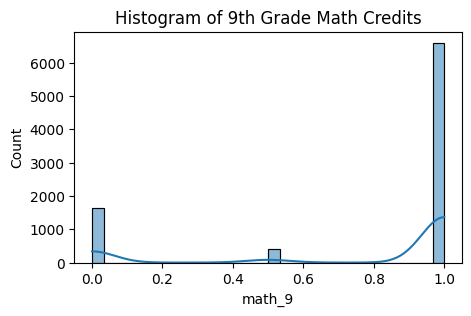

In [258]:
import seaborn as sns
import matplotlib.pyplot as plt

data = df['math_9']

# Creating histogram
plt.figure(figsize=(5, 3))
sns.histplot(data, bins=30, kde=True)
plt.title('Histogram of 9th Grade Math Credits')

plt.show()

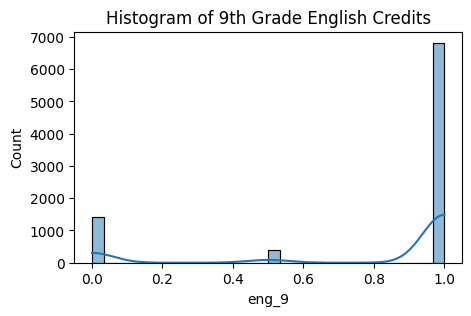

In [259]:
data = df['eng_9']

# Creating histogram
plt.figure(figsize=(5, 3))
sns.histplot(data, bins=30, kde=True)
plt.title('Histogram of 9th Grade English Credits')

plt.show()

### 2. Quantitative Test


The Shapiro-Wilk test is commonly used to test the normality of a dataset.

* P-value < 0.05: Data is likely not normally distributed.
* P-value ≥ 0.05: Data may be normally distributed.


In [260]:
from scipy.stats import shapiro

math_data = df['math_9']

# Shapiro-Wilk test
stat, p_value = shapiro(math_data)

print('Shapiro-Wilk Test Statistic:\n',stat)
print('P-value:\n', p_value)

Shapiro-Wilk Test Statistic:
 0.5367920466513962
P-value:
 5.7370655255285164e-92


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8629.
  res = hypotest_fun_out(*samples, **kwds)


In [261]:
eng_data = df['eng_9']

# Shapiro-Wilk test
stat, p_value = shapiro(eng_data)

print('Shapiro-Wilk Test Statistic:\n',stat)
print('P-value:\n', p_value)

Shapiro-Wilk Test Statistic:
 0.5094214114597428
P-value:
 2.5146717548230418e-93


 Since data is not normally distributed, we proceed with non-parametric tests for hypothesis testing

# Non-Parametric Hypothesis Testing:

We use tests such as the Mann-Whitney U test to compare between groups (e.g., Summer program participants vs. non-participants) and their credits.

In [262]:
from scipy.stats import mannwhitneyu

# Data for Summer Math Program participants and non-participants
math_credits_participants = df[df['sum_math_8'] == 1]['math_9']
math_credits_non_participants = df[df['sum_math_8'] == 0]['math_9']

# Mann-Whitney U test
stat, p_value = mannwhitneyu(math_credits_participants, math_credits_non_participants)

print('Mann-Whitney U Test Statistic for MATH:',stat)
print('P-value:', p_value)

Mann-Whitney U Test Statistic for MATH: 7397559.0
P-value: 0.0004489832221660468


In [263]:
# Data for Summer English Program participants and non-participants
eng_credits_participants = df[df['sum_eng_8'] == 1]['eng_9']
eng_credits_non_participants = df[df['sum_eng_8'] == 0]['eng_9']

# Mann-Whitney U test
stat, p_value = mannwhitneyu(eng_credits_participants, eng_credits_non_participants)

print('Mann-Whitney U Test Statistic for ENGLISH:',stat)
print('P-value:', p_value)

Mann-Whitney U Test Statistic for ENGLISH: 7291920.5
P-value: 0.04724977138633519


## ELL

In [264]:
# For ONLY ELL students
ell_students = df[df['s_ell'] == 1]

# Separating ELL students by summer English program participation
participated = ell_students[ell_students['sum_eng_8'] == 1]['eng_9']
did_not_participate = ell_students[ell_students['sum_eng_8'] == 0]['eng_9']

# Mann-Whitney U Test
stat, p_value = mannwhitneyu(participated, did_not_participate)

print('Mann-Whitney U Test Statistic for ENGLISH & ELL students :',stat)
print('P-value:', p_value)

Mann-Whitney U Test Statistic for ENGLISH & ELL students : 82461.5
P-value: 0.0445667838880055


In [265]:
# For ONLY ELL students
ell_students = df[df['s_ell'] == 1]

# Separating ELL students by summer Math program participation
participated = ell_students[ell_students['sum_math_8'] == 1]['math_9']
did_not_participate = ell_students[ell_students['sum_math_8'] == 0]['math_9']

# Mann-Whitney U Test
stat, p_value = mannwhitneyu(participated, did_not_participate)

print('Mann-Whitney U Test Statistic for MATH & ELL students :',stat)
print('P-value:', p_value)

Mann-Whitney U Test Statistic for MATH & ELL students : 71916.5
P-value: 0.7536827842265681


## SPED

In [266]:
# For ONLY SPED students
sped_students = df[df['s_sped'] == 1]

# Separating SPED students by summer Math program participation
participated = sped_students[sped_students['sum_math_8'] == 1]['math_9']
did_not_participate = sped_students[sped_students['sum_math_8'] == 0]['math_9']

# Mann-Whitney U Test
stat, p_value = mannwhitneyu(participated, did_not_participate)

print('Mann-Whitney U Test Statistic for MATH & SPED students:', stat)
print('P-value:', p_value)

Mann-Whitney U Test Statistic for MATH & SPED students: 89751.0
P-value: 0.052183986634121424


In [267]:
# For ONLY SPED students
sped_students = df[df['s_sped'] == 1]

# Separating SPED students by summer English program participation
participated = sped_students[sped_students['sum_eng_8'] == 1]['eng_9']
did_not_participate = sped_students[sped_students['sum_eng_8'] == 0]['eng_9']

# Mann-Whitney U Test
stat, p_value = mannwhitneyu(participated, did_not_participate)

print('Mann-Whitney U Test Statistic for ENGLISH & SPED students:', stat)
print('P-value:', p_value)

Mann-Whitney U Test Statistic for ENGLISH & SPED students: 83812.5
P-value: 0.9495471331639519


## FRPL

In [268]:
# For ONLY FRPL students
frpl_students = df[df['s_frpl'] == 1]

# Separating FRPL students by summer English program participation
participated = frpl_students[frpl_students['sum_eng_8'] == 1]['eng_9']
did_not_participate = frpl_students[frpl_students['sum_eng_8'] == 0]['eng_9']

# Mann-Whitney U Test
stat, p_value = mannwhitneyu(participated, did_not_participate)

print('Mann-Whitney U Test Statistic for ENGLISH & FRPL students:', stat)
print('P-value:', p_value)

Mann-Whitney U Test Statistic for ENGLISH & FRPL students: 1237521.5
P-value: 0.01209939041523439


In [269]:
from scipy.stats import mannwhitneyu

# For only FRPL students
frpl_students = df[df['s_frpl'] == 1]

# Separating FRPL students by summer Math program participation
participated = frpl_students[frpl_students['sum_math_8'] == 1]['math_9']
did_not_participate = frpl_students[frpl_students['sum_math_8'] == 0]['math_9']

# Mann-Whitney U Test
stat, p_value = mannwhitneyu(participated, did_not_participate)

print('Mann-Whitney U Test Statistic for MATH & FRPL students:', stat)
print('P-value:', p_value)

Mann-Whitney U Test Statistic for MATH & FRPL students: 1228915.5
P-value: 0.009898136433900915
